In [1]:
#importing all the libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv('census_data.csv')

In [3]:
df.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [4]:
# to classify the income variable in binary class
newincome=[]
for i in df['income']:
    if i == '>50K':
        y=1
    else:
        y=0
    newincome.append(y)    
df['newincome']=newincome

In [5]:
df.info()
# age , education_num, capital_gain, capital-loss, hours-per-week
# the above variables are all numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
newincome          45222 non-null int64
dtypes: float64(4), int64(2), object(9)
memory usage: 5.2+ MB


In [6]:
# renaming the variables makes easier to work with the columns
df.rename(columns={"education-num":"education_number","marital-status":"marital_status","capital-loss":"capital_loss","capital-gain":"capital_gain","hours-per-week":"hrs_per_week","native-country":"native_country"},inplace=True)

C:\Users\adity\Anaconda4\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5,1,'age Q-Q Plot')

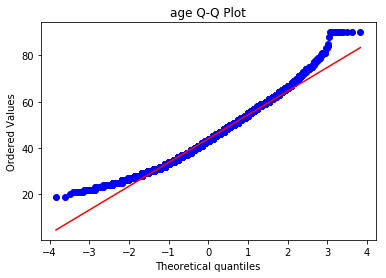

In [7]:
# anova between continuous and categrical variables to assess significance

# to run anova check for assumptions of ANOVA
# normality assumption
#stats.shapiro(df['libido'][df['dose'] == 'high'])
stats.shapiro(df['age'][df['newincome']==1])
stats.probplot(df['age'][df['newincome'] == 1], plot= plt)
plt.title("age Q-Q Plot")

C:\Users\adity\Anaconda4\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5,1,'cap_gain Q-Q Plot')

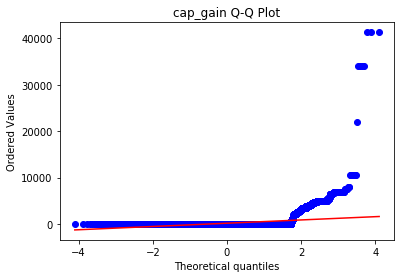

In [8]:
stats.shapiro(df['capital_gain'][df['newincome']==0])
stats.probplot(df['capital_gain'][df['newincome'] == 0], plot= plt)
plt.title("cap_gain Q-Q Plot")
# assumption of normality violated ( ANOVA will not be done)

C:\Users\adity\Anaconda4\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5,1,'cap_loss Q-Q Plot')

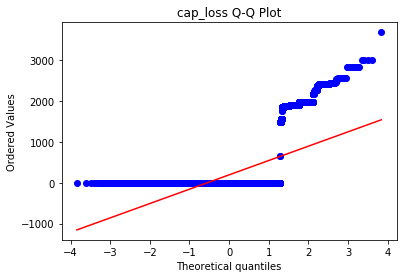

In [9]:
stats.shapiro(df['capital_loss'][df['newincome']==1])

stats.probplot(df['capital_loss'][df['newincome'] == 1], plot= plt)
plt.title("cap_loss Q-Q Plot")
# ANOVA assumptions not met

C:\Users\adity\Anaconda4\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5,1,'number of hrs worked')

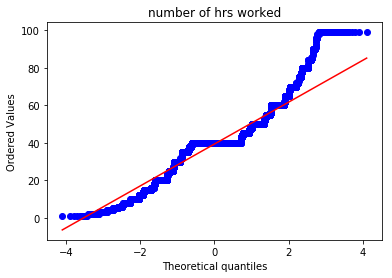

In [10]:
stats.shapiro(df['hrs_per_week'][df['newincome']==0])
stats.probplot(df['hrs_per_week'][df['newincome']==0],plot=plt)
plt.title("number of hrs worked")

C:\Users\adity\Anaconda4\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5,1,'number of hrs worked')

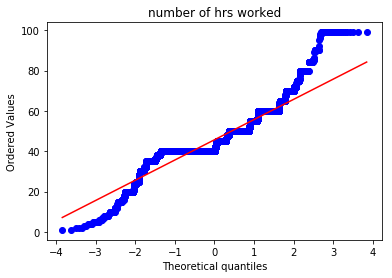

In [11]:
stats.shapiro(df['hrs_per_week'][df['newincome']==1])
stats.probplot(df['hrs_per_week'][df['newincome']==1],plot=plt)
plt.title("number of hrs worked")

In [12]:
# 2nd assumption of Anova- Homogeniety of Variance
# Homogeneity of Variance- perform levens test on age and hrs-per-week
# h0 : null hypothesis states that variance are equal sig1-sig2
# ha: alternate hypothesis that variance are not equal

stats.levene(df['age'][df['newincome']==0],
           df['age'][df['newincome']==1])
# fail to reject null
# ANOVA Assumptions are met

LeveneResult(statistic=929.86337816744492, pvalue=3.5678768119551583e-202)

In [13]:
# levens test on hrs-per-week
stats.levene(df['hrs_per_week'][df['newincome']==0],
            df['hrs_per_week'][df['newincome']==1])
#p val significant 
#fail to reject null

LeveneResult(statistic=29.460519688587873, pvalue=5.7360232062770614e-08)

                            OLS Regression Results                            
Dep. Variable:              newincome   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2692.
Date:                Wed, 08 Aug 2018   Prob (F-statistic):               0.00
Time:                        20:50:26   Log-Likelihood:                -24878.
No. Observations:               45222   AIC:                         4.976e+04
Df Residuals:                   45220   BIC:                         4.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0506      0.006     -8.326      0.0

C:\Users\adity\Anaconda4\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


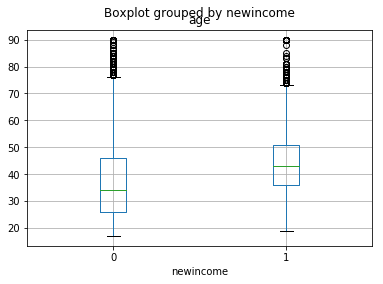

In [14]:
# the output variable is dichotomous or ordinal so test the association with ANOVA, ANOVA is a generalized linear model so


model = smf.ols(formula='newincome ~ age', data=df)
results = model.fit()
print (results.summary())

df.boxplot('age',by='newincome')

# inference
# let the null hypothesis or h0=  that there is not association between the two variables
# alternate hypothesis h1= there is association between the two variables
# the p value is low and F value is quite high so the results suggest there is association between age and newincome,
# _ however the F value and P values in ANOVA are affected by the sample size so the this results only suggest that there is association
# _between thee variables and does not suggest the strength of it.
# p value < than alpha (0.05) thus the reject null

In [15]:
model = smf.ols(formula='newincome~ hrs_per_week', data=df)
results = model.fit()
print (results.summary())

# results - large f value and small p value suggest that there is association between the variables (reject null)

                            OLS Regression Results                            
Dep. Variable:              newincome   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2461.
Date:                Wed, 08 Aug 2018   Prob (F-statistic):               0.00
Time:                        20:50:53   Log-Likelihood:                -24988.
No. Observations:               45222   AIC:                         4.998e+04
Df Residuals:                   45220   BIC:                         5.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0866      0.007    -12.327   

In [16]:
#I fitted a logit_function to see if the continous variables are significant or not.
# assumptions of Anova was not met thus I couldn't do Anova on them
## hence the p value from fitting the logit function gives us the idea whether or not the variable is significant


In [97]:
legref1= smf.logit(formula='newincome ~ capital_gain', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.508074
         Iterations 8


In [98]:
print(legref1.summary())

                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45220
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Aug 2018   Pseudo R-squ.:                 0.09265
Time:                        00:38:32   Log-Likelihood:                -22976.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.3371      0.012   -111.585      0.000      -1.361      -1.314
capital_gain     0.0003    7.3e-06     45.795      0.000       0.000       0.000


Optimization terminated successfully.
         Current function value: 0.550497
         Iterations 5


In [96]:
print(legref1.summary())

                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45220
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Aug 2018   Pseudo R-squ.:                 0.01689
Time:                        00:38:13   Log-Likelihood:                -24895.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                4.980e-188
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.1868      0.011   -104.378      0.000      -1.209      -1.165
capital_loss     0.0007   2.37e-05     29.459      0.000       0.001       0.001


In [117]:
# fit a logistic regression model to analyze the significant variables :


legref1= smf.logit(formula='newincome ~ age+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.325360
         Iterations 11


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
age                 45222 non-null int64
workclass           45222 non-null object
education_level     45222 non-null object
education_number    45222 non-null float64
marital_status      45222 non-null object
occupation          45222 non-null object
relationship        45222 non-null object
race                45222 non-null object
sex                 45222 non-null object
capital_gain        45222 non-null float64
capital_loss        45222 non-null float64
hrs_per_week        45222 non-null float64
native_country      45222 non-null object
income              45222 non-null object
newincome           45222 non-null int64
dtypes: float64(4), int64(2), object(9)
memory usage: 5.2+ MB


In [118]:
print(legref1.summary())
# p value greater than 0.05 suggest that the variable is not significant and can be removed,
# however none of the variables altogether is insignificant and there are some levels of the every variable that are insignificant
# now the insignificant variables can be binned together to make a single dummy variable which I did in the FInal_file, where I have
# binned education variables together.

                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           54
Date:                Sun, 05 Aug 2018   Pseudo R-squ.:                  0.4190
Time:                        00:47:38   Log-Likelihood:                -14713.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -7.2417      0.345    -20.981      0.000      -7.918      -6.565
workclass[T. Local-gov]                  

In [6]:
import statsmodels.formula.api as smf

In [10]:
print(legref1.summary())

                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45200
Method:                           MLE   Df Model:                           21
Date:                Thu, 02 Aug 2018   Pseudo R-squ.:                  0.1258
Time:                        19:28:06   Log-Likelihood:                -22137.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.0825      0.129    -16.170      0.000      -2.335      -1.830
workclass[T. Local-gov]             -0.6025      0.073     -8.309

In [17]:
legref2= smf.logit(formula='newincome ~ education_level', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.496270
         Iterations 8


In [18]:
print(legref2.summary())

                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                           15
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                  0.1137
Time:                        21:07:04   Log-Likelihood:                -22442.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.6329      0.114    -23.029      0.000      -2.857      -2.409
education_level[T. 11th]            -0.2114      0.158     -1.338

In [19]:
# chi square analysis


#h0 : income is independent of workclass
#ha : income is not independent of workclass 

pd.crosstab(index=df['newincome'],columns=df['workclass'])

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
newincome,,,,,,,
0,857,2185,26056,734,2737,1426,19
1,549,915,7251,912,1059,520,2


In [20]:
chi2_contingency(pd.crosstab(df.newincome, df.workclass))

(1207.2599145482257,
 1.2846681555116699e-257,
 6,
 array([[  1.05753138e+03,   2.33168369e+03,   2.50520609e+04,
           1.23804883e+03,   2.85518429e+03,   1.46369563e+03,
           1.57952766e+01],
        [  3.48468621e+02,   7.68316306e+02,   8.25493910e+03,
           4.07951174e+02,   9.40815709e+02,   4.82304365e+02,
           5.20472336e+00]]))

In [21]:
chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(df.newincome, df.workclass))
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
1207.25991455


===Degrees of Freedom===
6


===P-Value===
1.28466815551e-257


===Contingency Table===
[[  1.05753138e+03   2.33168369e+03   2.50520609e+04   1.23804883e+03
    2.85518429e+03   1.46369563e+03   1.57952766e+01]
 [  3.48468621e+02   7.68316306e+02   8.25493910e+03   4.07951174e+02
    9.40815709e+02   4.82304365e+02   5.20472336e+00]]


In [22]:
#To check the association between these variables and income
#df['education_level']
#df['marital-status']
#df['sex']
#df['race']
#df['occupation']
#df['relationship']
#df['hours-per-week']
pd.crosstab(df.newincome, df['occupation'])



occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
newincome,,,,,,,,,,,,,,
0,4784,10,4665,3117,1308,1911,2605,4612,229,3304,669,3953,1009,1838
1,756,4,1355,2867,172,135,365,196,3,2704,307,1455,411,478


In [23]:
chi2_stat, p_val_education_level, dof, ex = chi2_contingency(pd.crosstab(df.newincome, df.education_level))

In [31]:
chi2_stat, p_val_marital_status, dof, ex = chi2_contingency(pd.crosstab(df.newincome, df['marital_status']))

In [25]:
chi2_stat, p_val_sex, dof, ex = chi2_contingency(pd.crosstab(df.newincome, df['sex']))

In [26]:
chi2_stat, p_val_race, dof, ex = chi2_contingency(pd.crosstab(df.newincome, df['race']))

In [27]:
chi2_stat, p_val_occupation, dof, ex = chi2_contingency(pd.crosstab(df.newincome, df['occupation']))

In [28]:
chi2_stat, p_val_relationship, dof, ex = chi2_contingency(pd.crosstab(df.newincome, df['relationship']))

In [30]:
chi2_stat, p_val_hr_per, dof, ex = chi2_contingency(pd.crosstab(df.newincome, df['hrs_per_week']))

In [32]:
# all the p values are significant atalpha=0.05  and we reject null
#thus we need to find the strength of association amongst the variables and we'll use Cramer's V for that


print(p_val_education_level)

0.0


In [33]:
p_val_marital_status

0.0

In [34]:
p_val_sex

0.0

In [35]:
p_val_race

1.3794458063304673e-96

In [36]:
p_val_occupation

0.0

In [37]:
p_val_relationship

0.0

In [38]:
p_val_hr_per

0.0

In [39]:
#Cramer's V to decide the strength of the association between variables
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [43]:
def cramers_test(confusion_m):
    confusion_matrix=confusion_m.values
    chi2=chi2_contingency(confusion_matrix)[0]
    n=np.sum(confusion_matrix)
    return np.sqrt(chi2/(n*min(confusion_matrix.shape)-1))

In [41]:
# categorical- values
#df['education_level']
#df['marital-status']
#df['sex']
#df['race']
#df['occupation']
#df['relationship']
#df['hours-per-week']

confusion_education=pd.crosstab(index=df['newincome'],columns=df['education_level'])
confusion_marital=pd.crosstab(index=df['newincome'],columns=df['marital_status'])
confusion_sex=pd.crosstab(index=df['newincome'],columns=df['sex'])
confusion_race=pd.crosstab(index=df['newincome'],columns=df['race'])
confusion_occupation=pd.crosstab(index=df['newincome'],columns=df['occupation'])
confusion_relationship=pd.crosstab(index=df['newincome'],columns=df['relationship'])

In [44]:
education_corr=cramers_test (confusion_education)
marital_corr=cramers_test(confusion_marital)
sex_corr=cramers_test(confusion_sex)
race_corr=cramers_test(confusion_race)
occupation_corr=cramers_test(confusion_occupation)
relationship_corr=cramers_test(confusion_relationship)

In [45]:
education_corr

0.25747996547236363

In [46]:
marital_corr

0.31736085051394791

In [47]:
# has the lowest correlation against the dependent variable
sex_corr

0.15252786402746829

In [48]:
race_corr

0.070717652750829682

In [49]:
occupation_corr

0.24469059419384814

In [50]:
relationship_corr

0.32164861523397892

In [51]:
# redundant variable possibility
df[['relationship','marital_status']]

,relationship,marital_status
0,Not-in-family,Never-married
1,Husband,Married-civ-spouse
2,Not-in-family,Divorced
3,Husband,Married-civ-spouse
4,Wife,Married-civ-spouse
5,Wife,Married-civ-spouse
6,Not-in-family,Married-spouse-absent
7,Husband,Married-civ-spouse
8,Not-in-family,Never-married
9,Husband,Married-civ-spouse


In [52]:
# since the assumption of Chisq was not met
# atleast 5 inputs in each columns Fisher Exact test was adopted to do an independence test but apparently I could not find a code for that (please let me know if you can work around it)
#confusion_education.values
stats.fisher_exact(confusion_education)

ValueError: The input `table` must be of shape (2, 2).

In [27]:
import numpy as np
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()

stats = importr('stats')
m = np.array([[4,4],[4,5],[10,6]])
res = stats.fisher_test(m)
print 'p-value: {}'.format(res[0][0])
>> p-value: 0.668165917041

ModuleNotFoundError: No module named '__main__.statlib'; '__main__' is not a package

In [3]:
import numpy as np
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()

In [9]:
confusion_m=pd.crosstab(index=df['newincome'], columns=df['education_level'])

In [11]:
confusion_matrix=confusion_m.values

In [14]:
stats = importr('stats')
stats.fisher_test(confusion_matrix)

RRuntimeError: Error in (function (x, y = NULL, workspace = 2e+05, hybrid = FALSE, control = list(),  : 
  FEXACT error 7.
LDSTP is too small for this problem.
Try increasing the size of the workspace.


In [53]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ workclass', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.548148
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45215
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                 0.02108
Time:                        21:10:03   Log-Likelihood:                -24788.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                1.917e-227
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.4453      0.055     -8.147     

In [54]:
legref_1= smf.logit(formula='newincome ~ age', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.532330
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45220
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                 0.04933
Time:                        21:10:07   Log-Likelihood:                -24073.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7672      0.037    -74.776      0.000      -2.840      -2.695
age            0.0412      0.

In [55]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ marital_status', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.450613
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45215
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                  0.1953
Time:                        21:10:13   Log-Likelihood:                -20378.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -2.1

In [56]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ relationship', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.444987
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45216
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                  0.2053
Time:                        21:10:16   Log-Likelihood:                -20123.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1775      0.015    -12.076  

In [57]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ education_level', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.496270
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                           15
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                  0.1137
Time:                        21:10:18   Log-Likelihood:                -22442.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.6329      0.114    -23.02

In [58]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ occupation', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.496767
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45208
Method:                           MLE   Df Model:                           13
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                  0.1128
Time:                        21:10:24   Log-Likelihood:                -22465.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.8450      0.039    -47.14

In [59]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ race', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.554279
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45217
Method:                           MLE   Df Model:                            4
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                 0.01014
Time:                        21:10:28   Log-Likelihood:                -25066.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                8.832e-110
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.9751      0.147    -13.475      0.000   

In [60]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ sex', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.534260
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45220
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                 0.04589
Time:                        21:10:31   Log-Likelihood:                -24160.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.0547      0.026    -79.032      0.000      -2.106      -2.004
sex[T. Male]     1.2662

In [61]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ hrs_per_week', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.533700
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45220
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                 0.04689
Time:                        21:10:33   Log-Likelihood:                -24135.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.0709      0.045    -67.644      0.000      -3.160      -2.982
hrs_per_week     0.0463

In [62]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ capital_gain', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.508074
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45220
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                 0.09265
Time:                        21:10:36   Log-Likelihood:                -22976.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.3371      0.012   -111.585      0.000      -1.361      -1.314
capital_gain     0.0003

In [63]:
# step wise logistic regression to select top most important features in the model
#+workclass+education_level+marital_status+occupation+relationship+race+sex+capital_gain+capital_loss+hrs_per_week'
legref_1= smf.logit(formula='newincome ~ capital_loss', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.550497
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45220
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                 0.01689
Time:                        21:10:45   Log-Likelihood:                -24895.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                4.980e-188
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.1868      0.011   -104.378      0.000      -1.209      -1.165
capital_loss     0.0007

In [64]:
# marital_status and relationship accounts for highest R sq so let's combime them together
legref_1= smf.logit(formula='newincome ~ marital_status+relationship', data=df).fit()
print(legref_1.summary())
# results show redundancy so we'd be eliminating one of them

Optimization terminated successfully.
         Current function value: 0.442618
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45210
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                  0.2095
Time:                        21:10:51   Log-Likelihood:                -20016.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -2.0

In [65]:
# combine marital_status with occupation level
legref_1= smf.logit(formula='newincome ~ occupation + relationship ', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.396863
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45203
Method:                           MLE   Df Model:                           18
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                  0.2913
Time:                        21:10:55   Log-Likelihood:                -17947.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.4365      0.048     -9.18

In [67]:
#the following combination explains the 39 % of the variation in the model while the overall combination explains 40% of total model variation
# so the best five features for this model would be the following combination
# the combo was achieved by stepwise selection process _it was a manual process 
legref_1= smf.logit(formula='newincome ~ occupation+relationship + capital_gain + education_level + capital_loss', data=df).fit()
print(legref_1.summary())

Optimization terminated successfully.
         Current function value: 0.339586
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              newincome   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45186
Method:                           MLE   Df Model:                           35
Date:                Wed, 08 Aug 2018   Pseudo R-squ.:                  0.3935
Time:                        23:55:28   Log-Likelihood:                -15357.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.8473      0.137    -13.4